### Heart Diesease Prediction Using ML
classification problem tbh... simple one.. just getting the hang of it


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression # linear model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#  model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay

### Getting the data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
# data exploration.... exploratory data analysis

In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

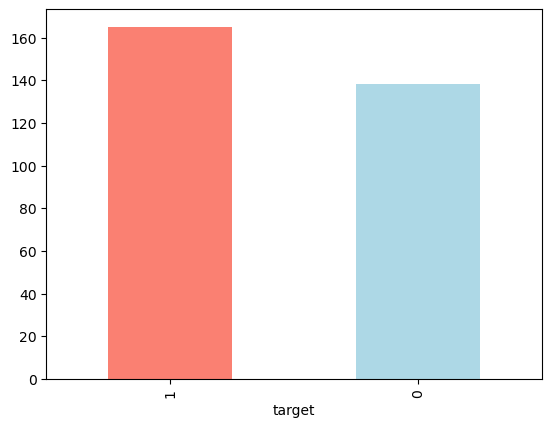

In [7]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing columns

In [10]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

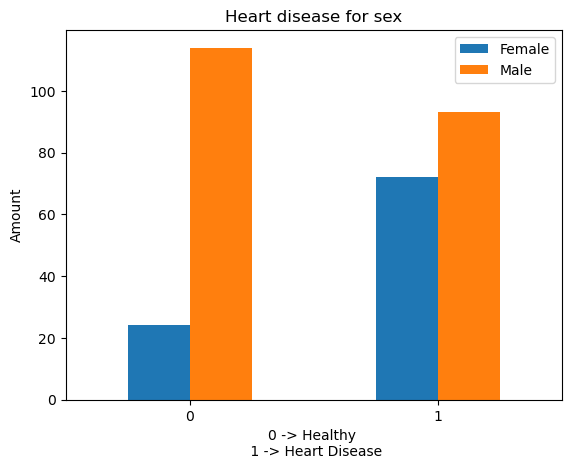

In [11]:
# compare target with sex
pd.crosstab(df['target'], df['sex']).plot(kind = 'bar');
plt.title('Heart disease for sex')
plt.xlabel('0 -> Healthy \n 1 -> Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)
plt.show()

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


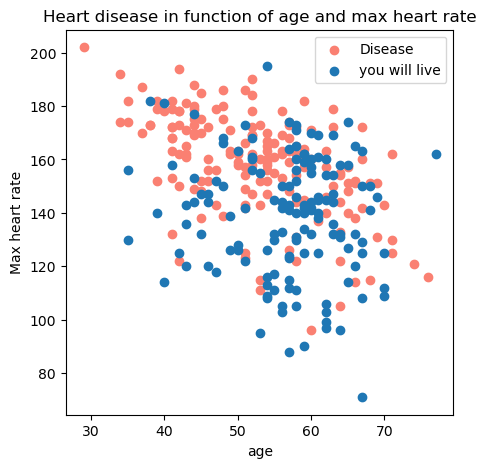

In [13]:
# age vs max heart rate
plt.figure(figsize= (5,5))

# with positive examples
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['thalach'], c = 'salmon');

#  with negative examples
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['thalach']);

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("Max heart rate")

plt.legend(["Disease", "you will live"]);

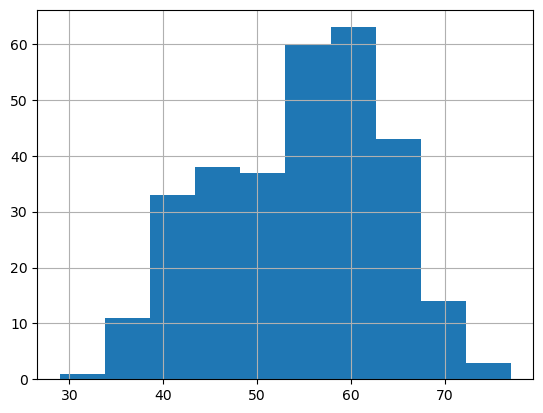

In [14]:
#  check spread of data.. age preciseily
df['age'].hist();

### heart disease vs chest pain

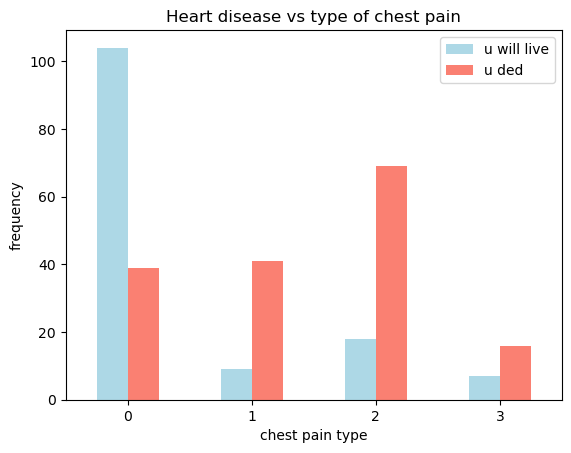

In [15]:
pd.crosstab(df['cp'], df['target']).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title('Heart disease vs type of chest pain')
plt.xlabel('chest pain type')
plt.ylabel('frequency')
plt.legend(['u will live', 'u ded']);
plt.xticks(rotation = 0);

### a corelation matrix baby

<Axes: >

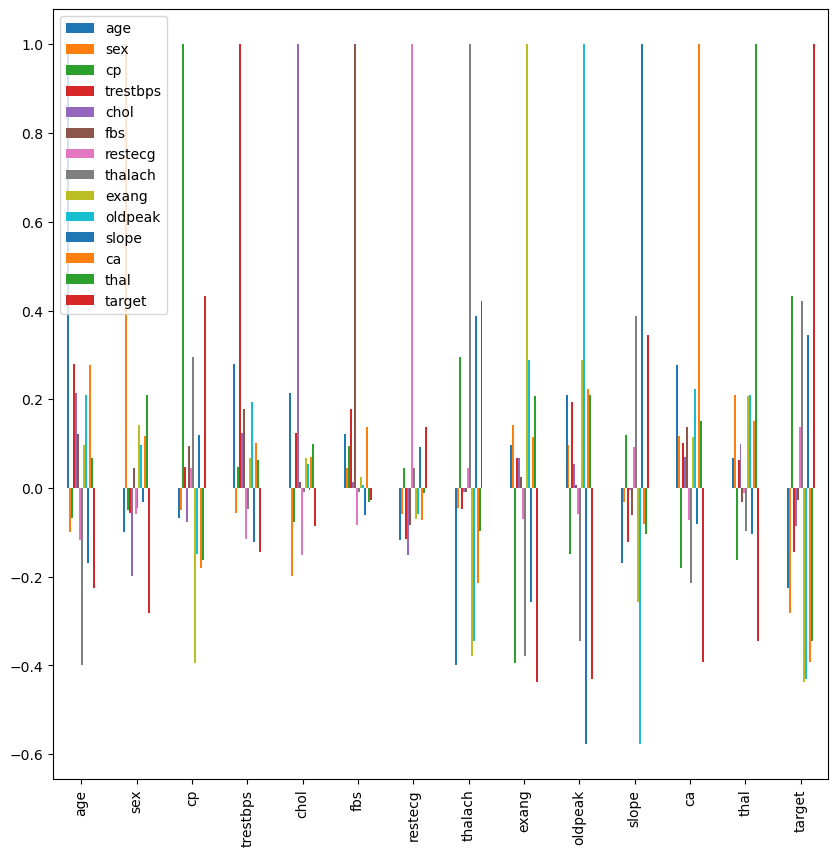

In [16]:
df.corr().plot(figsize = (10,10), kind = 'bar' )
# cant understand a thing tbh

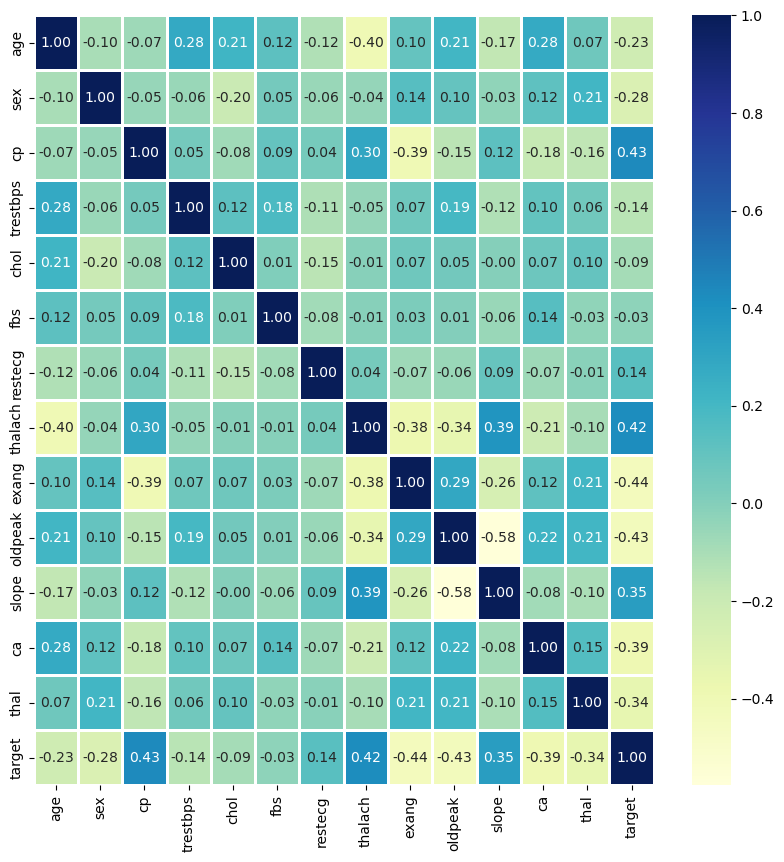

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot= True, linewidths= 1.0, cmap = 'YlGnBu', fmt = '.2f')

### Modelling Time :-)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
model.score(x_test, y_test)

0.7631578947368421

In [20]:
# bahut saare models
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

In [21]:
# to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the models
    """
    np.random.seed(6969)
    model_scores = {}

    for name, model in models.items():
        # fitting the model
        model.fit(x_train, y_train)

        # scoring and saving
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

In [22]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model_scores

{'Logistic Regression': 0.8421052631578947,
 'KNN': 0.6973684210526315,
 'Random Forest': 0.7894736842105263}

<Axes: >

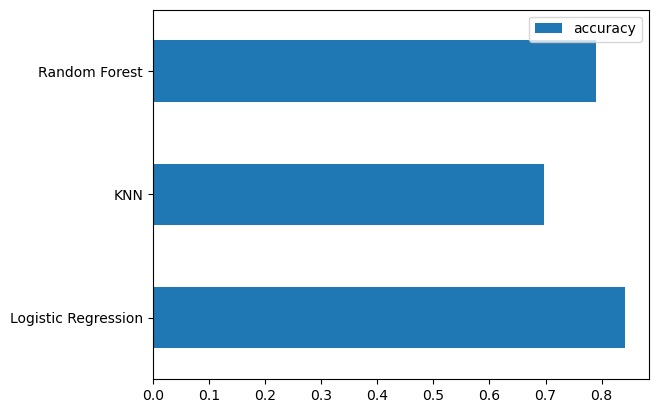

In [24]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.barh()

hyperparmeter tuning

In [25]:
#  tunning KNN

train_scroes = []
test_scroes = []

# list of different values of N neighbours
neighbours = range(1,21)

knn = KNeighborsClassifier()

# looping through neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)

    knn.fit(x_train, y_train)
    train_scroes.append(knn.score(x_train, y_train))

    test_scroes.append(knn.score(x_test, y_test))

In [26]:
l1 = np.array(train_scroes)
l2 = np.array(test_scroes)

l1.T, l2.T

(array([1.        , 0.79735683, 0.79735683, 0.78854626, 0.76211454,
        0.73568282, 0.73127753, 0.73127753, 0.70484581, 0.7092511 ,
        0.70044053, 0.68281938, 0.71806167, 0.69603524, 0.71806167,
        0.70484581, 0.68722467, 0.69603524, 0.70044053, 0.69603524]),
 array([0.55263158, 0.55263158, 0.59210526, 0.63157895, 0.69736842,
        0.71052632, 0.69736842, 0.65789474, 0.68421053, 0.69736842,
        0.69736842, 0.67105263, 0.68421053, 0.67105263, 0.69736842,
        0.69736842, 0.69736842, 0.68421053, 0.67105263, 0.71052632]))

Max knn score on test data -> 71.05


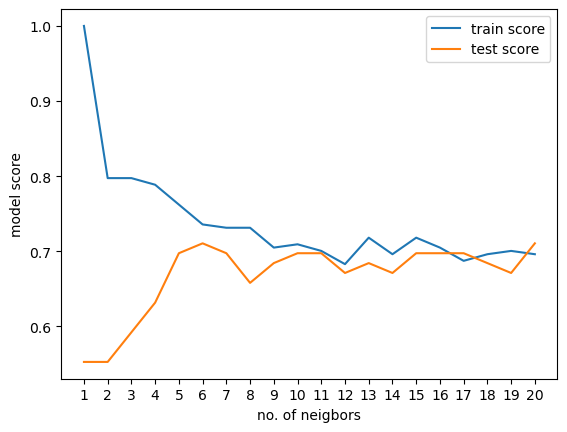

In [27]:
plt.plot(neighbours, l1, label = 'train score')
plt.plot(neighbours, l2, label = 'test score')
plt.xlabel('no. of neigbors')
plt.ylabel('model score')
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"Max knn score on test data -> {max(test_scroes) * 100:.2f}")


In [28]:
#  randomizedsearchcv


In [30]:
#  logistic regression
# log_reg_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization technique
#     'C': np.logspace(1e-5, 100),  # Inverse of regularization strength; smaller values specify stronger regularization.
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use for optimization.
#     'max_iter': [100, 200, 300, 400, 500, 1000],  # Maximum number of iterations taken for the solvers to converge.
#     'class_weight': [None, 'balanced'],  # Weights associated with classes. If not given, all classes are supposed to have weight one.
#     'dual': [False, True],  # Dual formulation is only implemented for l2 penalty with liblinear solver. Consider setting to False by default.
#     'fit_intercept': [True, False],  # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
#     'intercept_scaling': [1, 1.5, 2, 2.5],  # Useful only when the solver 'liblinear' is used and 'fit_intercept' is set to True.
#     'l1_ratio': [None, 0.25, 0.5, 0.75]  # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'.
# }

log_reg_grid = {
    "C" : np.logspace(-4, 4, 20),
    "solver" : ['liblinear']
}

rf_grid = {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3, 5, 10],
          'min_samples' : np.arange(2, 20, 2),
          'min_samples_lead' : np.arange(1, 20, 2)}

In [36]:
# tuning logistic regression
np.random.seed(420)

rs_log_reg = RandomizedSearchCV(LogisticRegression(n_jobs=-1), param_distributions= log_reg_grid, cv = 10, n_iter= 20, verbose= True)

# fitting the tuned one
rs_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarn

RandomizedSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8421052631578947

In [63]:
model_scores

{'Logistic Regression': 0.8157894736842105,
 'KNN': 0.631578947368421,
 'Random Forest': 0.7763157894736842}

In [38]:
gs_log_reg = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid= log_reg_grid, cv = 10, verbose= True)

gs_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
D:\Coding\ml_supervised\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarn

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(x_test, y_test)

0.8421052631578947

In [41]:
rs_log_reg.score(x_test, y_test)

0.8421052631578947

In [42]:
model_scores

{'Logistic Regression': 0.8421052631578947,
 'KNN': 0.6973684210526315,
 'Random Forest': 0.7894736842105263}

In [43]:
y_preds = gs_log_reg.predict(x_test)

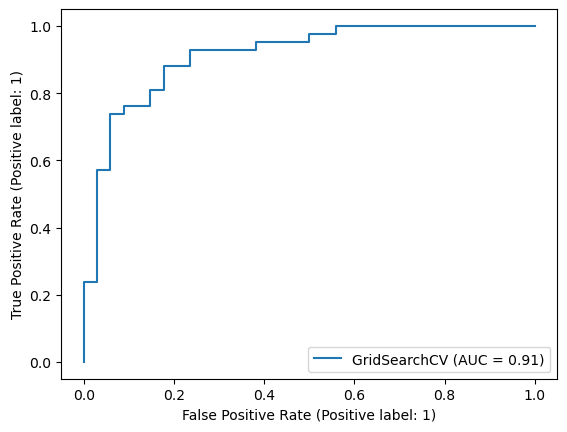

In [50]:
# plot roc curve and auc score
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [53]:
#  confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)
cnf_matrix

array([[26,  8],
       [ 4, 38]], dtype=int64)

In [56]:
# using seaborn
def confusion_matrix_plot(y_test, y_preds):
    """
    Plots a consfusion matrix using heatnmap from seabornn
    """

    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot= True, cbar= False)

    plt.xlabel('True Positives')
    plt.ylabel('Predicted Label')

    plt.show()

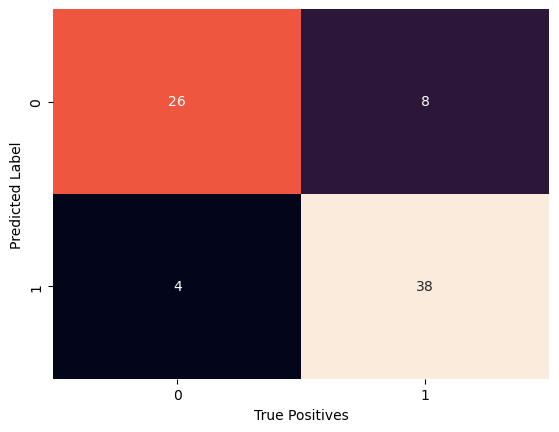

In [57]:
confusion_matrix_plot(y_test, y_preds)

In [58]:
class_rep = classification_report(y_test, y_preds)

In [62]:
print(class_rep)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        34
           1       0.83      0.90      0.86        42

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



In [65]:
df.shape


(303, 14)

In [66]:
x_test.shape


(76, 13)

In [68]:
x_train.shape

(227, 13)

In [69]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [72]:
clf = LogisticRegression(C = 0.08858667904100823, solver = "liblinear")

In [79]:
# cross validated accuracy
cv_acc = cross_val_score(clf, x, y, cv = 10, scoring= 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8349462365591398

In [80]:
cv_precision = cross_val_score(clf, x, y, cv = 10, scoring= 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8199215799680196

In [81]:
cv_recall = cross_val_score(clf, x, y, cv = 10, scoring= 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9014705882352942

In [82]:
cv_f1 = cross_val_score(clf, x, y, cv = 10, scoring= 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8553580777318366

In [84]:
# visualizing
cv_matrix  = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precison" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1}, index = [0])

In [86]:
cv_matrix

,Accuracy,Precison,Recall,F1
0,0.834946,0.819922,0.901471,0.855358


In [87]:
cv_matrix.T

,0
Accuracy,0.834946
Precison,0.819922
Recall,0.901471
F1,0.855358


<Axes: >

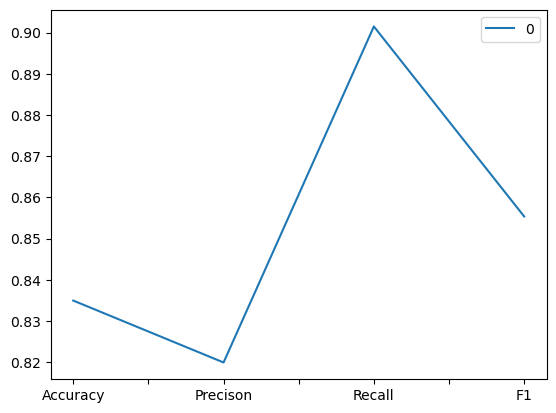

In [88]:
cv_matrix.T.plot()

<Axes: >

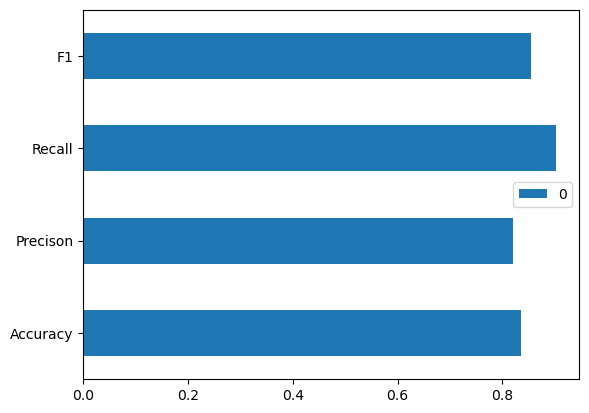

In [90]:
cv_matrix.T.plot.barh()

### Feature importance

In [93]:
# check coef_
clf.fit(x_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [94]:
clf.coef_

array([[ 0.00584298, -0.51967144,  0.49768528, -0.01892715, -0.00094978,
         0.02644178,  0.22147579,  0.02645952, -0.36186258, -0.42685769,
         0.34956484, -0.58284056, -0.53367986]])

In [96]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [99]:
feature_dict = pd.DataFrame(feature_dict, index = [0])

<Axes: >

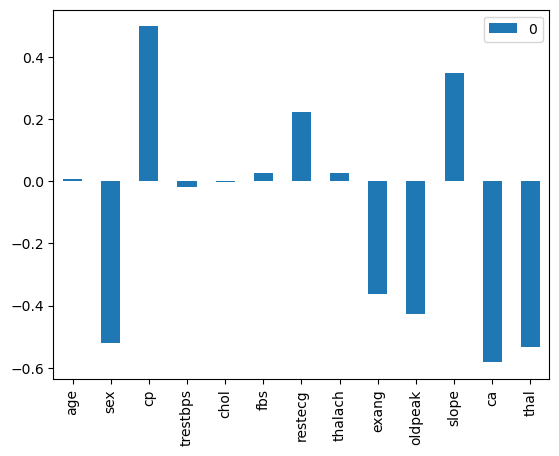

In [101]:
feature_dict.T.plot.bar()

In [102]:
from joblib import dump
dump(clf, 'heart_disease_model.joblib')

['heart_disease_model.joblib']